#### Libraries

In [1]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import os
import cv2
import imutils
import math

2022-11-30 16:12:15.868751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 16:12:16.030269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 16:12:16.030290: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-30 16:12:17.065728: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

### Preprocessing of the data

In [3]:
data_dir = '../COMP_473_Project/CK+'
aug_data_dir = '../COMP_473_Project/CK_Augmented'

if not os.path.isdir(aug_data_dir):
    os.mkdir(aug_data_dir)

for image_class in os.listdir(data_dir):
    # print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_name = image
        print(image_name)
        image_path = os.path.join(data_dir, image_class, image)

        image = cv2.imread(image_path)  # cv2.IMREAD_UNCHANGED
        face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

        faces = face_cascade.detectMultiScale(image, 1.3, 5)
        global crop_img
        for (x, y, w, h) in faces:
            # To draw a rectangle in a face
            # cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)
            crop_img = image[y:y + h, x:x + w]

        cv2.imwrite(os.path.join(aug_data_dir, image_class, image_name), crop_img)


### Load the data

In [9]:
import numpy as np
from matplotlib import pyplot as plt


In [11]:
data = tf.keras.utils.image_dataset_from_directory('CK+')

Found 309 files belonging to 6 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

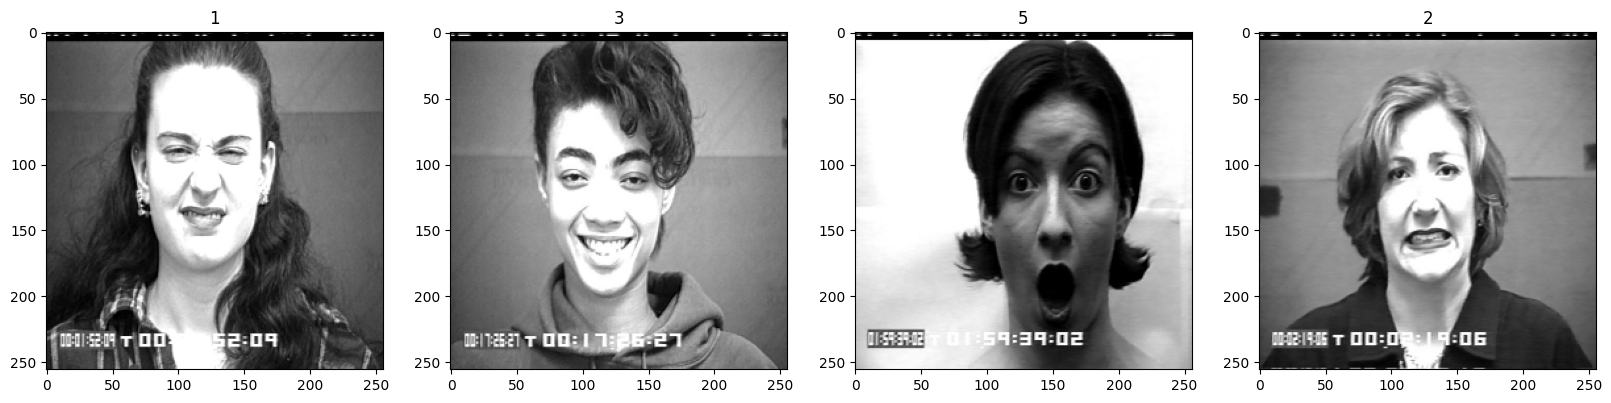

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scale the data down

In [7]:
data = data.map(lambda x, y: (x / 255, y))

### Split the data


In [8]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)
print(train_size)
print(val_size)
print(test_size)

7
2
1


### No Pre-Processing Classifier

In [ ]:
img_w, img_h = 48, 48

train_data_dir = '../COMP_473_Project/TrainSet'
test_data_dir = '../COMP_473_Project/TestSet'
nb_train_samples = 700
nb_validation_samples = 295
epochs = 100
batch_size = 10



### Testing with openCV

In [ ]:
import cv2
import imutils

#rotation
img = cv2.imread("/Users/mantagaori/Desktop/comp473/A3/S010_006_00000013.png")
result = []
rot_angle = [-10, -5, 0, 5, 10]
for a in rot_angle:
    imgr = imutils.rotate(img, angle=a)
    result += [imgr]
# for i in range(len(result)):
#     print("new image ****")
#     print(result[i][28][5:9])
for r in result:
    cv2.imshow("rotate test", r)
    cv2.waitKey()

#rerotate
angles = [10, 5, 0, -5, -10]
resultu = []
for i in range(len(result)):
    imgr = imutils.rotate(result[i], angle=angles[i])
    resultu += [imgr]

for i in range(len(result)):
    print("oritianl***")
    print(img[28][5:9])
    print("new image ****")
    print(result[i][28][5:9])
    print("re-rotated image ****")
    print(resultu[i][28][5:9])

# Cropping an image
result2 = []
for r in result:
    imgc = r[10:48, 10:38]
    result2 += [imgc]

for r in result2:
    cv2.imshow("crop", r)
    cv2.waitKey()

#intensity normalization -> Histogram equalization
result3 = []
for r in result:
    R, G, B = cv2.split(r)
    output1_R = cv2.equalizeHist(R)
    output1_G = cv2.equalizeHist(G)
    output1_B = cv2.equalizeHist(B)
    equ = cv2.merge((output1_R, output1_G, output1_B))
    result3 += [equ]

for r in result3:
    cv2.imshow('Normalized Image', r)
    cv2.waitKey()

